In [11]:
import pandas as pd
import numpy as np



data = pd.read_csv("C:/Users/HP/Downloads/ba.csv",sep=";")
print(data.head(5))


   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri ...         2    999         0  nonexistent   
1  telephone   may         fri ...         4    999         0  nonexistent   
2  telephone   jun         wed ...         1    999         0  nonexistent   
3  telephone   jun         fri ...         3    999         0  nonexistent   
4   cellular   nov         mon ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employe

In [12]:
# Dealing with unknowns in the categorical data

data_rows = (data.shape)[0]
data_columns = (data.shape)[1]


row_jobs = list(data.loc[data['job'] == 'unknown'].index)
row_marital = list(data.loc[data['marital']=='unknown'].index)
row_education = list(data.loc[data['education']=='unknown'].index)
row_default = list(data.loc[data['default']=='unknown'].index)
row_housing = list(data.loc[data['housing']=='unknown'].index)
row_loan = list(data.loc[data['loan']=='unknown'].index)

del_rows_duplicates = row_jobs + row_marital + row_education + row_default + row_housing + row_loan
del_rows_no_duplicates = list(set(del_rows_duplicates))

percentage_unknowns = (float(len(del_rows_no_duplicates))/ float(data_rows))*100
print(percentage_unknowns )

# This compromises of 1/4 of the data therefore we cannot simply remove the rows with unknown values
# In order to deal with the unknown values we must replace them with their respective mode values 

job_mode = data.mode()['job'].values[0]
marital_mode = data.mode()['marital'].values[0]
education_mode = data.mode()['education'].values[0]
default_mode = data.mode()['default'].values[0]
housing_mode = data.mode()['housing'].values[0]
loan_mode = data.mode()['loan'].values[0]


data['job'].replace(['unknown'],[job_mode],inplace=True)
data['marital'].replace(['unknown'],[marital_mode],inplace=True)
data['education'].replace(['unknown'],[education_mode],inplace =True)
data['default'].replace(['unknown'],[default_mode],inplace = True)
data['housing'].replace(['unknown'],[housing_mode],inplace = True)
data['loan'].replace(['unknown'],[loan_mode],inplace = True)



24.981791697


In [13]:
# Dealing with outliers in the numerical data

age_z =  pd.DataFrame(abs((data['age'] - data.mean()['age'])/(data.std()['age']))> 3)
age_outliers = list(age_z[age_z['age'] == True].index)

duration_z =  pd.DataFrame(abs((data['duration'] - data.mean()['duration'])/(data.std()['duration']))> 3)
duration_outliers = list(duration_z[duration_z['duration'] == True].index)

campaign_z =  pd.DataFrame(abs((data['campaign'] - data.mean()['campaign'])/(data.std()['campaign']))> 3)
campaign_outliers = list(campaign_z[campaign_z['campaign'] == True].index)

pdays_z =  pd.DataFrame(abs((data['pdays'] - data.mean()['pdays'])/(data.std()['pdays']))> 3)
pdays_outliers = list(pdays_z[pdays_z['pdays'] == True].index)

previous_z =  pd.DataFrame(abs((data['previous'] - data.mean()['previous'])/(data.std()['previous']))> 3)
previous_outliers = list(previous_z[previous_z['previous'] == True].index)

emp_z =  pd.DataFrame(abs((data['emp.var.rate'] - data.mean()['emp.var.rate'])/(data.std()['emp.var.rate']))> 3)
emp_outliers = list(emp_z[emp_z['emp.var.rate'] == True].index)

consp_z =  pd.DataFrame(abs((data['cons.price.idx'] - data.mean()['cons.price.idx'])/(data.std()['cons.price.idx']))> 3)
consp_outliers = list(consp_z[consp_z['cons.price.idx'] == True].index)

consc_z =  pd.DataFrame(abs((data['cons.conf.idx'] - data.mean()['cons.conf.idx'])/(data.std()['cons.conf.idx']))> 3)
consc_outliers = list(consc_z[consc_z['cons.conf.idx'] == True].index)

eur_z =  pd.DataFrame(abs((data['euribor3m'] - data.mean()['euribor3m'])/(data.std()['euribor3m']))> 3)
eur_outliers = list(eur_z[eur_z['euribor3m'] == True].index)

nr_z =  pd.DataFrame(abs((data['nr.employed'] - data.mean()['nr.employed'])/(data.std()['nr.employed']))> 3)
nr_outliers = list(nr_z[nr_z['nr.employed'] == True].index)

outliers_list = list(set(age_outliers +  duration_outliers + campaign_outliers + pdays_outliers + previous_outliers + emp_outliers + consp_outliers + consc_outliers + emp_outliers + nr_outliers))

percentage_outliers = (float(len(outliers_list)) / float(data_rows)) * 100
print(percentage_outliers)

# As the percentage of the outliers in the data is less than 10 percent therefore we will remove the outliers from the data 

data = data.drop(outliers_list)


9.75965040058


In [14]:
# Converting categorical variables into numeric variables

# job,marital, education,default,housing ,loan,contact,month, day_of_week,poutcome
# unemployed,single,university.degree,yes,yes,yes,telephone,dec,fri,failure


job_d = (pd.get_dummies(data['job'])).drop(columns='unemployed')
marital_d = (pd.get_dummies(data['marital'])).drop(columns='single')
education_d = (pd.get_dummies(data['education'])).drop(columns='university.degree') 
default_d = (pd.get_dummies(data['default'])).drop(columns='yes')
housing_d = (pd.get_dummies(data['housing'])).drop(columns='yes')
loan_d = (pd.get_dummies(data['loan'])).drop(columns='yes')
contact_d = (pd.get_dummies(data['contact'])).drop(columns='telephone')
month_d = (pd.get_dummies(data['month'])).drop(columns='dec')
day_of_week_d = (pd.get_dummies(data['day_of_week'])).drop(columns='fri')
poutcome_d = (pd.get_dummies(data['poutcome'])).drop(columns='failure') 
y_d =  (pd.get_dummies(data['y'])).drop(columns='no') 


data = data.drop(columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])
data = pd.concat([data,job_d,marital_d,education_d,default_d,housing_d,loan_d,contact_d,month_d,day_of_week_d,poutcome_d,y_d],axis=1)
print(data.head())


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30       487         2    999         0          -1.8          92.893   
1   39       346         4    999         0           1.1          93.994   
2   25       227         1    999         0           1.4          94.465   
3   38        17         3    999         0           1.4          94.465   
4   47        58         1    999         0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed ...   may  nov  oct  sep  mon  thu  \
0          -46.2      1.313       5099.1 ...     1    0    0    0    0    0   
1          -36.4      4.855       5191.0 ...     1    0    0    0    0    0   
2          -41.8      4.962       5228.1 ...     0    0    0    0    0    0   
3          -41.8      4.959       5228.1 ...     0    0    0    0    0    0   
4          -42.0      4.191       5195.8 ...     0    1    0    0    1    0   

   tue  wed  nonexistent  yes  
0    0    0            1    0 

In [104]:
# Class Imbalance
label_zero = data[data['output']==0].shape[0]
label_one = data[data['output']==1].shape[0]

class_zero_percentage = (float(label_zero) / float(data.shape[0]))*100 
class_one_percentage = (float(label_one) / float(data.shape[0]))*100

print("Class Zero Percentage = ",class_zero_percentage, "%")
print("Class One Percentage = ",class_one_percentage, "%")


('Class Zero Percentage = ', 92.52085014796879, '%')
('Class One Percentage = ', 7.479149852031208, '%')


In [ ]:
# Justification for train_test split
There is a huge class imbalance in the data set, class zero is about 93 percent of the entire data while class one is about 7 
percent of the entire data. In order to counter this the test set is chosen to be 30 percent of the entire data so that the
classification is less biased which could be possible in the case in which the test data has almost all values belonging to 
the same class.

In [15]:
# Normalizing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= data.drop(columns='yes').values
y=data[['yes']].values
X = scaler.fit_transform(X)
print("X_scaled = " , X)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

('X_scaled = ', array([[-1.01438158,  1.35816793, -0.17119883, ..., -0.50738791,
        -0.49436056,  0.33447804],
       [-0.08012391,  0.60504674,  0.98369417, ..., -0.50738791,
        -0.49436056,  0.33447804],
       [-1.53341362, -0.03056618, -0.74864532, ..., -0.50738791,
         2.02281507,  0.33447804],
       ...,
       [-1.32580081, -0.90119563, -0.17119883, ..., -0.50738791,
        -0.49436056, -2.98973288],
       [ 1.89219784,  1.57716062, -0.74864532, ..., -0.50738791,
        -0.49436056,  0.33447804],
       [-0.59915595, -0.308313  , -0.74864532, ..., -0.50738791,
         2.02281507,  0.33447804]]))


In [ ]:
# Explaination - Data Preprocessing
The data contains a total of twenty features out of which ten are numerical while the other ten are categorical in nature.
In general the data doesnot contain any instances of any valid feature values. However, there are a large number of instances
in which the feature values have unknowns in them. These unknowns could have been removed however the above analysis show that 
the unknown valued rows( a row containing at least one unknown) are about 25% of the entire data therefore they should be removed. 
In order to deal with this the feature value with unknowns are replaced by the mode of the feature values. In addition, outliers
(where z-value > 3 )are also found in the numerical features which are simply removed because they contribute to less than percent
of the entire data set. Lastly, all the categorical variables are converted into numerical by using the get_dummies() function but
for each categorical feature, one label column is deleted in order to make sure that there are no problems of multicollinearity.

In [16]:
# Finding the best parameters for Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ('gini','entropy') , 'max_depth' : [2,5,10,15,None], 'max_features':('auto','sqrt','log2',None)}
tree = DecisionTreeClassifier(random_state=0)
clf_tree = GridSearchCV(tree,parameters,cv=5)
clf_tree.fit(X_train,y_train)
best_parameters = clf_tree.best_params_
print(best_parameters)

{'max_features': None, 'criterion': 'entropy', 'max_depth': 5}


In [105]:
# Training a Decision Tree Classifier and Prediction
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth = 5, max_features =None)
clf_tree_c = tree_class.fit(X_train,y_train)
output = clf_tree_c.predict(X_test)
X_df = pd.DataFrame(X_test)
names = data.columns.values
names[-1]='output'
out_df = pd.DataFrame(output)
df_tree = pd.concat([X_df,out_df],axis=1)
df_tree.columns=names
print(df_tree.head())
print("done")

        age  duration  campaign  pdays  previous  emp.var.rate  \
0 -0.599156 -0.970632 -0.171199    0.0 -0.334478      0.800333   
1  1.165553 -0.911878 -0.748645    0.0 -0.334478     -0.193156   
2 -0.702962 -1.210990  2.716034    0.0 -0.334478     -1.319110   
3 -0.910575 -0.351043 -0.748645    0.0 -0.334478      0.800333   
4 -0.495350  0.994961 -0.171199    0.0 -0.334478     -2.047669   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   ...         may  \
0        1.569577      -0.268551   0.666742     0.816415   ...   -0.728189   
1       -0.680994      -0.313721   0.238430     0.328496   ...   -0.728189   
2       -1.227180      -1.262283  -1.491687    -1.132241   ...    1.373270   
3       -0.246892       1.018784   0.726380     0.816415   ...   -0.728189   
4       -2.458323       2.080271  -1.730843    -1.478166   ...   -0.728189   

        nov       oct       sep       mon       thu       tue       wed  \
0 -0.349689 -0.113166 -0.094645 -0.506130 -0.514087  1.9708

In [106]:
from sklearn.metrics import accuracy_score
print("Accuracy of Decision Tree =  ",accuracy_score(y_test,output))

('Accuracy of Decision Tree =  ', 0.921146953405018)


In [19]:
# Finding the best parameter set for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [1,3,5,7,10,12,15,20,25], 'criterion' : ('gini','entropy'), 'max_depth' : [2,5,10,15,None],'max_features':('auto','sqrt','log2',None),'bootstrap':(True,False)}
forest = RandomForestClassifier(random_state=0)
clf_forest = GridSearchCV(forest,parameters,cv=5)
clf_forest.fit(X_train,y_train)
best_parameters = clf_forest.best_params_
print(best_parameters)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


{'max_features': None, 'n_estimators': 10, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2}


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [107]:
# Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(random_state=0,n_estimators=10,criterion='entropy',max_depth=2,max_features=None,bootstrap=True)
clf_forest_c = forest_class.fit(X_train,y_train)
output = clf_forest_c.predict(X_test)
X_df = pd.DataFrame(X_test)
names = data.columns.values
names[-1]='output'
out_df = pd.DataFrame(output)
df_forest = pd.concat([X_df,out_df],axis=1)
df_forest.columns=names
print(df_forest.head())
print("done")

        age  duration  campaign  pdays  previous  emp.var.rate  \
0 -0.599156 -0.970632 -0.171199    0.0 -0.334478      0.800333   
1  1.165553 -0.911878 -0.748645    0.0 -0.334478     -0.193156   
2 -0.702962 -1.210990  2.716034    0.0 -0.334478     -1.319110   
3 -0.910575 -0.351043 -0.748645    0.0 -0.334478      0.800333   
4 -0.495350  0.994961 -0.171199    0.0 -0.334478     -2.047669   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   ...         may  \
0        1.569577      -0.268551   0.666742     0.816415   ...   -0.728189   
1       -0.680994      -0.313721   0.238430     0.328496   ...   -0.728189   
2       -1.227180      -1.262283  -1.491687    -1.132241   ...    1.373270   
3       -0.246892       1.018784   0.726380     0.816415   ...   -0.728189   
4       -2.458323       2.080271  -1.730843    -1.478166   ...   -0.728189   

        nov       oct       sep       mon       thu       tue       wed  \
0 -0.349689 -0.113166 -0.094645 -0.506130 -0.514087  1.9708

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [108]:
from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest =  ",accuracy_score(y_test,output))

('Accuracy of Random Forest =  ', 0.9274193548387096)


In [33]:
# Finding the best parameter set for Neural Networks
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

scores_list=[]

for i in range(1,50):
    neural_nets = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,), random_state=1,activation='relu')
    scores = cross_val_score(neural_nets,X_train,y_train,cv=5)
    scores_list.append( (float(sum(scores)))/float(len(scores)))
best_hidden_layer = scores_list.index(max(scores_list)) + 1
print(scores_list)
print("best_hidden_layer = " ,best_hidden_layer)

[0.9265672523254098, 0.9200346965893992, 0.898115310792854, 0.9211907574191643, 0.9146537723313155, 0.9104178355234017, 0.9054266942270781, 0.9104200501993208, 0.9042684187213939, 0.9096478665288646, 0.9031167872434667, 0.9038860180126974, 0.9019607264137015, 0.9065746345784733, 0.9046537723313156, 0.9096552487819283, 0.9084962350509376, 0.9142602982430237, 0.8981204783699985, 0.9069614646390078, 0.9035014026280821, 0.9081204783699984, 0.9050354348147055, 0.9081094049904032, 0.904270633397313, 0.9108039273586298, 0.9100346965893991, 0.9134999261774693, 0.913883065111472, 0.912339435995866, 0.9084991879521629, 0.9038786357596338, 0.9046574634578473, 0.9008076184851618, 0.9169570352871697, 0.9073460800236232, 0.9038823268861658, 0.9092713716226191, 0.9100339583640927, 0.9065775874796987, 0.9035021408533884, 0.9111907574191642, 0.9065709434519416, 0.9042684187213939, 0.9061892809685516, 0.9073453417983168, 0.9131145725675476, 0.9092669422707811, 0.9027262660564004]
('best_hidden_layer = '

In [109]:
# Training the multi-layer perceptron
from sklearn.neural_network import MLPClassifier
neural_nets_c = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4,), random_state=1,activation='relu')
neural_nets_c.fit(X_train,y_train)
output = neural_nets_c.predict(X_test)
X_df = pd.DataFrame(X_test)
names = data.columns.values
names[-1]='output'
out_df = pd.DataFrame(output)
df_neural_nets = pd.concat([X_df,out_df],axis=1)
df_neural_nets.columns=names
print(df_neural_nets.head())
print("done")


        age  duration  campaign  pdays  previous  emp.var.rate  \
0 -0.599156 -0.970632 -0.171199    0.0 -0.334478      0.800333   
1  1.165553 -0.911878 -0.748645    0.0 -0.334478     -0.193156   
2 -0.702962 -1.210990  2.716034    0.0 -0.334478     -1.319110   
3 -0.910575 -0.351043 -0.748645    0.0 -0.334478      0.800333   
4 -0.495350  0.994961 -0.171199    0.0 -0.334478     -2.047669   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   ...         may  \
0        1.569577      -0.268551   0.666742     0.816415   ...   -0.728189   
1       -0.680994      -0.313721   0.238430     0.328496   ...   -0.728189   
2       -1.227180      -1.262283  -1.491687    -1.132241   ...    1.373270   
3       -0.246892       1.018784   0.726380     0.816415   ...   -0.728189   
4       -2.458323       2.080271  -1.730843    -1.478166   ...   -0.728189   

        nov       oct       sep       mon       thu       tue       wed  \
0 -0.349689 -0.113166 -0.094645 -0.506130 -0.514087  1.9708

In [110]:
from sklearn.metrics import accuracy_score
print("Accuracy of Neural Networks =  ",accuracy_score(y_test,output))

('Accuracy of Neural Networks =  ', 0.9238351254480287)


In [ ]:
# Explaination
Decision Trees:
    The decision tree classifier in scikit learn is implemented using CART (Classification and Regression Trees). CART is a binary
    tree with split points as the features in the data set. The tree is learned using a greedy algorithm on the training data
    while the predictions are made by traversing the binary tree given a new input record. However, as the algorithm is greedy
    therefore it would result in overfitting if parameters like depth of the tree are not chosen wisely.

Random Forests:
    A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and
    uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the
    original input sample size but the samples are drawn with replacement if bootstrap value is set to true.
        
Neural Networks:
    The neural network model implemented in the scikit learn is feed forward neural network. The number of hidden layers,
    activation functions and learning rates lie in the parameter set. The weights of the model are learned by using the numerical
    methods which are given in the function as parameters such as adam, lbfgs. The gradients for the updation of weights are 
    learned by using the back propogation algorithm.
    
    

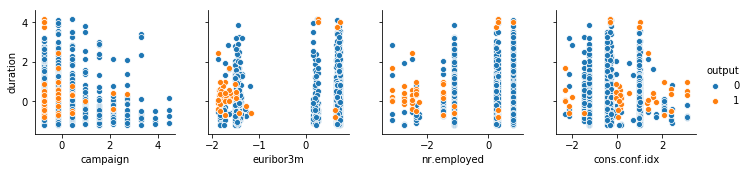

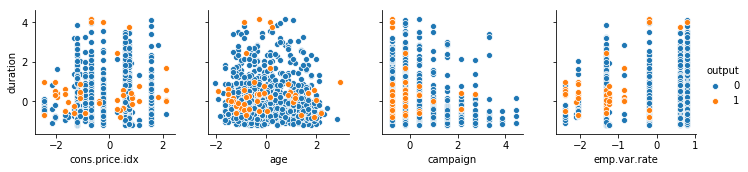

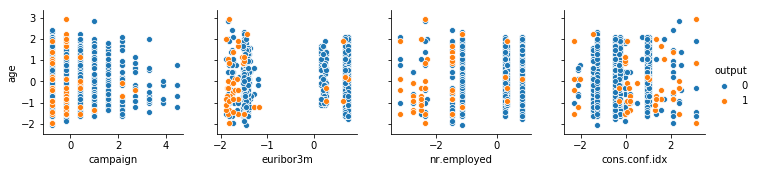

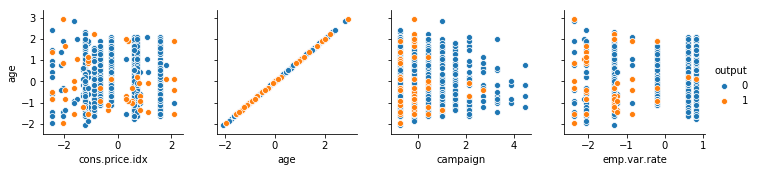

In [66]:
#Plotting Decision Tree Classifier Results
import seaborn as sns
import matplotlib.pyplot as plt
#print(df_tree)
sns.pairplot(df_tree, x_vars=['campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='duration',hue='output')
sns.pairplot(df_tree, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='duration',hue='output')
sns.pairplot(df_tree, x_vars=['campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='age',hue='output')
sns.pairplot(df_tree, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='age',hue='output')
plt.show()


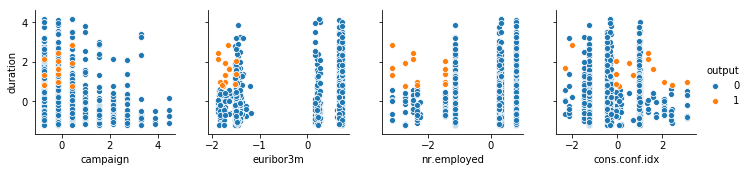

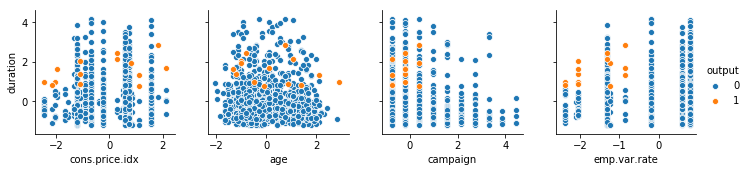

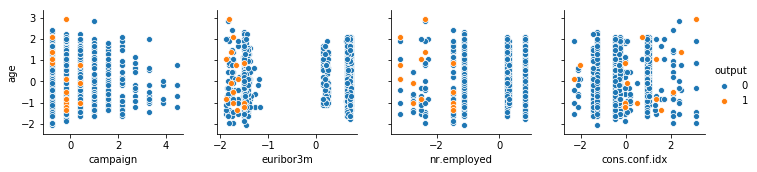

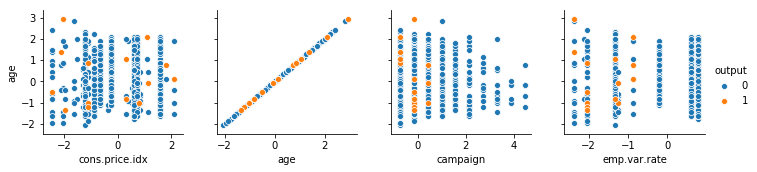

In [67]:
#Plotting Random Forest Classifier Results
import seaborn as sns
import matplotlib.pyplot as plt
#print(df_tree)
sns.pairplot(df_forest, x_vars=['campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='duration',hue='output')
sns.pairplot(df_forest, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='duration',hue='output')
sns.pairplot(df_forest, x_vars=['campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='age',hue='output')
sns.pairplot(df_forest, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='age',hue='output')
plt.show()

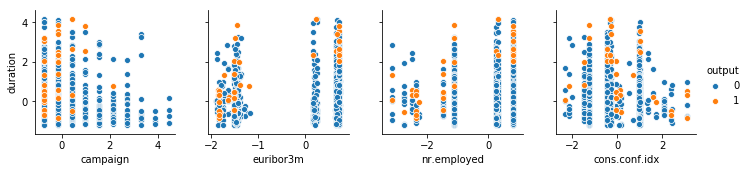

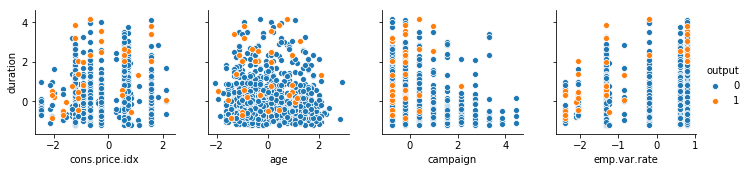

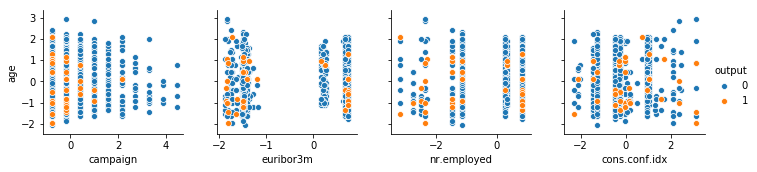

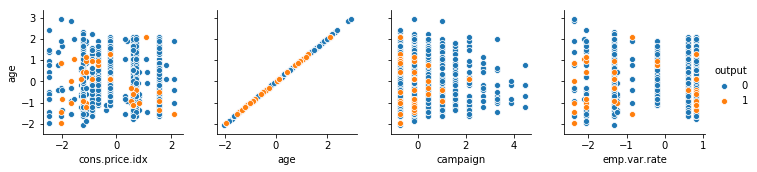

In [70]:
#Plotting Neural Network Result
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_neural_nets, x_vars=['campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='duration',hue='output')
sns.pairplot(df_neural_nets, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='duration',hue='output')
sns.pairplot(df_neural_nets, x_vars=['campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='age',hue='output')
sns.pairplot(df_neural_nets, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='age',hue='output')
plt.show()

In [ ]:
# Explaination of the Plots
It can be seen clearly from the graphs that the number of 0s are far more than the number of 1s across all the graphs of all the
classifiers which is because of class imbalance. We can also deduce that the degree/amount of seperability is very less across 
all the classifiers. The data is not linearly seperable and points of different classes are jumbled together. However, it can
be seen that without any doubt Random Forest provide results that have a higher level of seperability as the two classes are a bit
distinct and not at all spaces in nearest proximity. This is because Random Forest is an ensemble method and ensemble methods in
general make classifiers stronger which might have led to generation of better results against class imbalanced data set.

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
tree_report = classification_report(y_test,df_tree['output'].values)
[tree_tn, tree_fp, tree_fn, tree_tp] = confusion_matrix(y_test,df_tree['output'].values).ravel()
print("Decison Tree Classification Report")
print(tree_report)
print(tree_tn,tree_fp,tree_fn,tree_tp)

forest_report = classification_report(y_test,df_forest['output'].values)
[forest_tn, forest_fp, forest_fn, forest_tp] = confusion_matrix(y_test,df_forest['output'].values).ravel()
print("Random Forest Classification Report")
print(forest_report)
print(forest_tn,forest_fp,forest_fn,forest_tp)

neural_nets_report = classification_report(y_test,df_neural_nets['output'].values)
[neural_nets_tn, neural_nets_fp, neural_nets_fn, neural_nets_tp] = confusion_matrix(y_test,df_neural_nets['output'].values).ravel()
print("Neural Networks Classification Report")
print(neural_nets_report)
print(neural_nets_tn,neural_nets_fp,neural_nets_fn,neural_nets_tp)



Decison Tree Classification Report
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1029
          1       0.49      0.26      0.34        87

avg / total       0.90      0.92      0.91      1116

(1005, 24, 64, 23)
Random Forest Classification Report
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      1029
          1       0.71      0.11      0.20        87

avg / total       0.91      0.93      0.90      1116

(1025, 4, 77, 10)
Neural Networks Classification Report
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1029
          1       0.53      0.21      0.30        87

avg / total       0.90      0.92      0.91      1116

(1013, 16, 69, 18)


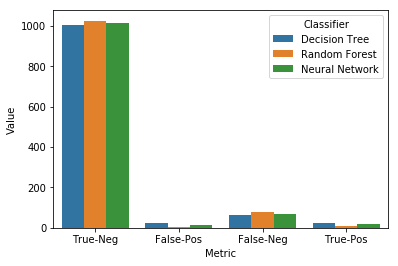

In [93]:
df_metrics = pd.DataFrame(columns=['Metric','Value','Classifier'])
df_metrics["Metric"]=["True-Neg","False-Pos","False-Neg","True-Pos","True-Neg","False-Pos","False-Neg","True-Pos","True-Neg","False-Pos","False-Neg","True-Pos"]
df_metrics["Value"]=[tree_tn, tree_fp, tree_fn, tree_tp,forest_tn, forest_fp, forest_fn, forest_tp,neural_nets_tn, neural_nets_fp, neural_nets_fn, neural_nets_tp]
df_metrics["Classifier"] =["Decision Tree","Decision Tree","Decision Tree","Decision Tree","Random Forest","Random Forest","Random Forest","Random Forest","Neural Network","Neural Network","Neural Network","Neural Network"]



ax=sns.barplot(x='Metric', y='Value', hue='Classifier', data=df_metrics)
plt.show()

In [ ]:
# Explaination of Results
The accuracy of all the classifiers is strikingly simmilar, Decision Tree have an accuracy of 92.1 % while Random Forest and 
Neural Networks have accuracies of 92.7% and 92.4 % respectively.The accuracies for SVM and KNN in the homework were around 90 %
as well .If we talk about the precision and recall then both of these values are a bit better for Random Forest as compared to 
the Neural Networks and Decision Trees. This can also been seen easily from the Metric graph above where Random Forest has a 
higher True-Negative percentage. The metric count for True-Negative is highest for all classifiers because of the class imbalance where almost 92% of the entire data belongs to the negative class.
Eventhough, the performance of all the classifiers is roughly simmilar however Random Forests perform a little better especially 
for imbalanced data set because they are an ensemble of the decision trees and ensembles in general make a classifier strong-
either by giving more weight to missclassified points,random sampling without replacement or by voting in classifier and they
also result in no overfitting. In terms of time efficiency Decision Tree take the least time followed by Random Forest and 
lastly Neural Networks.

In [ ]:
# Dealing with Class Imbalance
1. Under-Sampling : This would result in a decrease in the number of negative examples (majority class) resulting in the ratio 
                    of positive and negative examples being roughly equal.
2. Over-Sampling  : This would result in an increase in the number of positive examples (minority class) resulting in the ratio of
                    positive and negative examples being roughly equal.
3. Ensemble Methods
4. Change Performance Metric : Ideally, it should be F-score because accuracy is biased towards the majority class.
5.K-Fold Cross Validation